Task 1
Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.




1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

- The aesthetics in this plot are represented by the variables used. 
- The aesthetic is Income on the x-axis, Life Expectancy on the y-axis. 
- The colors (fill) of the country bubbles are represented by regions: green for North and South America, yellow for Europe, blue for Africa, and red for Asia. 
- The size of the bubbles are reprsented by the population of the country. 

2. Import the q1data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [6]:
import pandas as pd

# import data set
q1data = pd.read_csv("/Users/achur/OneDrive/Desktop/School/CP Fall 2024/544/q1data.csv")
# remove any missing values
q1data = q1data.dropna()

In [12]:
from plotnine import ggplot, geom_point, aes, labs, scale_size, scale_y_continuous, geom_text
from plotnine import theme, theme_bw, scale_x_log10, scale_fill_manual, element_text

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


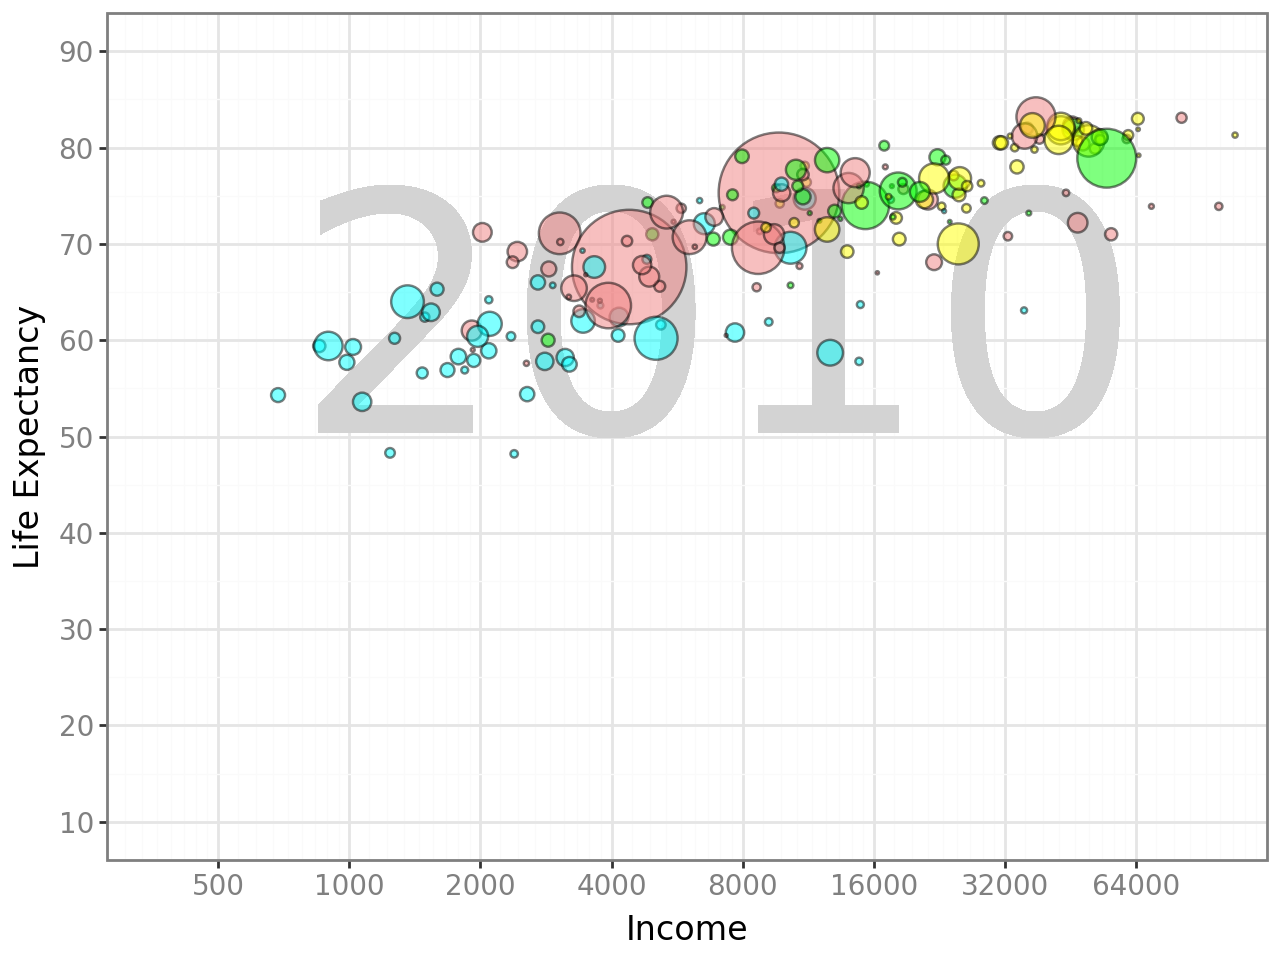

In [17]:
# create plot
(ggplot(q1data,
    aes( x = "income", y = "life_exp", size = "population", fill = "four_regions"))
    + geom_text(aes(x = 7000, y = 60, label = "2010"), size = 120, color = "lightgrey")
    + geom_point(alpha = 0.5, color = "black", stroke = 0.5)
    + labs(x = "Income", y = "Life Expectancy", fill = "World Regions")
    + scale_size(range = [.1, 24])
    + scale_x_log10(limits = [0, 128000], 
    breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], 
    labels = ["500", "1000", "2000", "4000", "8000", "16000", "32000", "64000"])
    + scale_y_continuous(limits = (10, 90), breaks = range(10, 91, 10))
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + theme_bw()
    + theme(legend_position = "none", text = element_text(family = "Keyboard", size = 14), 
    axis_title = element_text(family = "Keyboard", size = 12, color = "black"), 
    axis_text = element_text(family = "Keyboard", size = 10, color = "gray"))
    )